### **`Q.No-01`    Install and load the latest versions of TensorFlow and Keras. Print their versions.**

**Ans :-**

**Step 1: Install TensorFlow and Keras**

In [1]:
pip install tensorflow keras --upgrade

Note: you may need to restart the kernel to use updated packages.


**Step 2: Load TensorFlow and Keras, and Print Their Versions**

In [2]:
import tensorflow as tf
import keras

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Print Keras version (Keras is now part of TensorFlow)
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.3.3


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-02`    Load the Wine Quality dataset and explore its dimensions.**

**Ans :-**

**Step 1: Load the Wine Quality dataset**

In [102]:
import pandas as pd

wine_data = pd.read_csv("wine.csv")

# Display the first few rows of the dataset
display(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


**Step 2: Explore the dimensions of the dataset**

In [103]:
print("Wine Quality Dataset Dimensions (rows, columns):", wine_data.shape)

Wine Quality Dataset Dimensions (rows, columns): (1599, 12)


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-03`    Check for null values, identify categorical variables, and encode them.**

**Ans :-**

**Step 1: Check for Null Values**

In [104]:
# Step 1: Check for null values
null_values = wine_data.isnull().sum()
print("Null Values in the Dataset:\n", null_values)

Null Values in the Dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Step 2: Identify Categorical Variables**

In [105]:
# Step 2: Identify categorical variables
# Check the data types of the columns
data_types = wine_data.dtypes
print("\nData Types of the Columns:\n", data_types)


Data Types of the Columns:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object


**Step 3: Encode Categorical Variables**

In [106]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize LabelEncoder
label_encoder = LabelEncoder()

# Step 2: Encode the 'quality' column
wine_data['quality'] = label_encoder.fit_transform(wine_data['quality'])

# Verify the transformation
print("Encoded unique values in 'quality':", wine_data['quality'].unique())

Encoded unique values in 'quality': [0 1]


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-04`    Separate the features and target variables from the dataframe.**

**Ans -**

**Step 1: Identify Features and Target**

In [107]:
target_column = 'quality'

**Step 2: Split Features and Target**

In [108]:
X = wine_data.drop(columns=[target_column])  # Features: all columns except 'quality'
y = wine_data[target_column]  # Target: 'quality'

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-05`    Perform a train-test split and divide the data into training, validation, and test datasets.**

**Ans :-**

**Step 1: Perform a Train-Test Split**

In [109]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Perform a Train-Validation Split**

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-06`    Perform scaling on the dataset.**

**Ans :-**

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-07`    Create at least 2 hidden layers and an output layer for the binary categorical variables.**

**Ans :-**

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train_scaled, X_val_scaled, and y_train are already defined and scaled

# Step 1: Define the neural network model
model = Sequential()

# Input layer implicitly defined by input_shape parameter in the first hidden layer
# Add first hidden layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add second hidden layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Step 2: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=20,  # You can adjust the number of epochs
                    batch_size=32,  # You can adjust the batch size
                    validation_data=(X_val_scaled, y_val))

# Print the model summary
print("\nModel Summary:")
model.summary()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print(f"\nValidation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/20


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4799 - loss: 0.7013 - val_accuracy: 0.6953 - val_loss: 0.6314
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.5967 - val_accuracy: 0.7370 - val_loss: 0.5765
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.5437 - val_accuracy: 0.7656 - val_loss: 0.5437
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 0.5257 - val_accuracy: 0.7656 - val_loss: 0.5370
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.4782 - val_accuracy: 0.7500 - val_loss: 0.5300
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7323 - loss: 0.5172 - val_accuracy: 0.7682 - val_loss: 0.5242
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7561 - loss: 0.4990 - val_accuracy: 0.7682 - val_loss: 0.5261
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7702 - loss: 0.4776 - val_accuracy: 0.7578 - val_loss: 0.5214
Epo

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.7621 - loss: 0.5385

Validation Loss: 0.5264
Validation Accuracy: 0.7682


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-08`    Create a Sequential model and add all the layers to it.**

**Ans :-**

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Initialize the Sequential model
model = Sequential()

# Step 2: Add layers to the model
# Add the first hidden layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add the second hidden layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-09`    Implement a TensorBoard callback to visualize and monitor the model's training process.**

**Ans :-**

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
import os

# Step 1: Initialize the Sequential model
model = Sequential()

# Step 2: Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Define the TensorBoard callback
log_dir = "logs/fit/"  # Define the directory to save logs
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                   histogram_freq=1,  # Frequency for histogram computation
                                   write_graph=True,  # Whether to write the graph
                                   write_images=True)  # Whether to write model weights

# Step 5: Train the model with the TensorBoard callback
history = model.fit(X_train_scaled, y_train, 
                    epochs=20,  # Adjust as needed
                    batch_size=32,  # Adjust as needed
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback])

# Print the model summary
print("\nModel Summary:")
model.summary()

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5698 - loss: 0.6919 - val_accuracy: 0.7266 - val_loss: 0.5952
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7215 - loss: 0.5843 - val_accuracy: 0.7500 - val_loss: 0.5575
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7740 - loss: 0.5310 - val_accuracy: 0.7474 - val_loss: 0.5389
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.5177 - val_accuracy: 0.7526 - val_loss: 0.5285
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.5242 - val_accuracy: 0.7500 - val_loss: 0.5247
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.5027 - val_accuracy: 0.7578 - val_loss: 0.5251
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7654 - loss: 0.4946 - val_accuracy: 0.7578 - val_loss: 0.5195
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7740 - loss: 0.4942 - val_accuracy: 0.7578 - val_loss:

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-10`     Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.**

**Ans :-**

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import os

# Step 1: Initialize the Sequential model
model = Sequential()

# Step 2: Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Define the TensorBoard callback
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                   histogram_freq=1, 
                                   write_graph=True, 
                                   write_images=True)

# Step 5: Define the Early Stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss',  # Metric to monitor
                                        patience=5,  # Number of epochs with no improvement to wait
                                        restore_best_weights=True)  # Restore model weights from the epoch with the best value

# Step 6: Train the model with the callbacks
history = model.fit(X_train_scaled, y_train, 
                    epochs=50,  # Adjust as needed
                    batch_size=32,  # Adjust as needed
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback])

# Print the model summary
print("\nModel Summary:")
model.summary()

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5705 - loss: 0.6700 - val_accuracy: 0.7109 - val_loss: 0.5878
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7283 - loss: 0.5484 - val_accuracy: 0.7396 - val_loss: 0.5564
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7436 - loss: 0.5266 - val_accuracy: 0.7552 - val_loss: 0.5396
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7653 - loss: 0.4886 - val_accuracy: 0.7552 - val_loss: 0.5352
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7660 - loss: 0.4972 - val_accuracy: 0.7552 - val_loss: 0.5287
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7518 - loss: 0.4845 - val_accuracy: 0.7604 - val_loss: 0.5219
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7518 - loss: 0.4927 - val_accuracy: 0.7578 - val_loss: 0.5210
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.4562 - val_accuracy: 0.7604 - val_loss:

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-11`     Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.**

**Ans :-**

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
import os

# Step 1: Initialize the Sequential model
model = Sequential()

# Step 2: Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Define the TensorBoard callback
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                   histogram_freq=1, 
                                   write_graph=True, 
                                   write_images=True)

# Step 5: Define the Early Stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=5, 
                                        restore_best_weights=True)

# Step 6: Define the ModelCheckpoint callback with .keras extension
checkpoint_dir = "checkpoints/"
os.makedirs(checkpoint_dir, exist_ok=True)  # Create directory if it does not exist
checkpoint_path = os.path.join(checkpoint_dir, "model-{epoch:02d}-{val_loss:.2f}.keras")
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, 
                                            monitor='val_loss',  # Metric to monitor
                                            save_best_only=True,  # Save only the best model
                                            save_weights_only=False,  # Save the entire model
                                            verbose=1)  # Print messages when saving

# Step 7: Train the model with the callbacks
history = model.fit(X_train_scaled, y_train, 
                    epochs=50,  # Adjust as needed
                    batch_size=32,  # Adjust as needed
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

# Print the model summary
print("\nModel Summary:")
model.summary()

Epoch 1/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 16s 606ms/step - accuracy: 0.4688 - loss: 0.6872
Epoch 1: val_loss improved from inf to 0.59767, saving model to checkpoints/model-01-0.60.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6331 - loss: 0.6592 - val_accuracy: 0.7214 - val_loss: 0.5977
Epoch 2/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6875 - loss: 0.5865
Epoch 2: val_loss improved from 0.59767 to 0.55802, saving model to checkpoints/model-02-0.56.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7351 - loss: 0.5638 - val_accuracy: 0.7370 - val_loss: 0.5580
Epoch 3/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7500 - loss: 0.5348
Epoch 3: val_loss improved from 0.55802 to 0.54068, saving model to checkpoints/model-03-0.54.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7490 - loss: 0.5294 - val_accuracy: 0.7422 - val_loss: 0.5407
Epoch 4/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.4924
Epoch 4: val_loss

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-12`    Print the model summary.**

**Ans :-**

In [117]:
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-13`    Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].**

**Ans :-**

In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

# Step 1: Initialize the Sequential model
model = Sequential()

# Step 2: Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='binary_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])  # Accuracy as the metric

# Print the model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-14`    Compile the model with the specified loss function, optimizer, and metrics.**

**Ans :-**

In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
import os

# Assuming X_train_scaled, X_val_scaled, and y_train are already defined and scaled

# Step 1: Initialize the Sequential model
model = Sequential()

# Step 2: Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='binary_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])  # Accuracy as the metric

# Print the model summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-15`    Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.**

**Ans :-**

In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
import os

# Step 1: Initialize the Sequential model
model = Sequential()

# Step 2: Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='binary_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])  # Accuracy as the metric

# Step 4: Define the callbacks

# TensorBoard callback
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, 
                                   histogram_freq=1, 
                                   write_graph=True, 
                                   write_images=True)

# EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=5, 
                                        restore_best_weights=True)

# ModelCheckpoint callback
checkpoint_dir = "checkpoints/"
os.makedirs(checkpoint_dir, exist_ok=True)  # Create directory if it does not exist
checkpoint_path = os.path.join(checkpoint_dir, "model-{epoch:02d}-{val_loss:.2f}.keras")
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, 
                                            monitor='val_loss',  # Metric to monitor
                                            save_best_only=True,  # Save only the best model
                                            save_weights_only=False,  # Save the entire model
                                            verbose=1)  # Print messages when saving

# Step 5: Train the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=50,  # Number of epochs
                    batch_size=32,  # Batch size
                    validation_data=(X_val_scaled, y_val),  # Validation data
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])  # Callbacks

# Print the model summary
print("\nModel Summary:")
model.summary()

Epoch 1/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 18s 673ms/step - accuracy: 0.2812 - loss: 0.7886
Epoch 1: val_loss improved from inf to 0.62541, saving model to checkpoints/model-01-0.63.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5208 - loss: 0.6975 - val_accuracy: 0.6979 - val_loss: 0.6254
Epoch 2/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7500 - loss: 0.5974
Epoch 2: val_loss improved from 0.62541 to 0.58374, saving model to checkpoints/model-02-0.58.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7244 - loss: 0.5781 - val_accuracy: 0.7161 - val_loss: 0.5837
Epoch 3/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.5435
Epoch 3: val_loss improved from 0.58374 to 0.56184, saving model to checkpoints/model-03-0.56.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7631 - loss: 0.5246 - val_accuracy: 0.7266 - val_loss: 0.5618
Epoch 4/50
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7188 - loss: 0.5711
Epoch 4: val_loss

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-16`    Get the model's parameters.**

**Ans :-**

In [121]:
# Retrieve model parameters (weights and biases)
weights = model.get_weights()

# Print the model's parameters
for layer_index, layer_weights in enumerate(weights):
    print(f"Layer {layer_index} weights shape: {layer_weights.shape}")
    print(layer_weights)

Layer 0 weights shape: (11, 64)
[[ 0.252244   -0.06672496  0.26256868 -0.20820007  0.15984207 -0.14422774
   0.07485095  0.12469071  0.16859518 -0.01780064  0.05160279 -0.13291006
   0.02903761  0.12965189  0.03143163  0.13200991  0.23446499 -0.10226671
   0.22572614 -0.27653438 -0.1559211   0.07191352 -0.01508695  0.24258843
   0.15175898  0.01140536  0.07584591  0.21841325  0.16030586  0.06964987
  -0.26169065  0.15817565 -0.24279301 -0.01295551 -0.06938116  0.2506089
  -0.1190399   0.13622765 -0.29478645 -0.05652851 -0.00463289 -0.1709378
   0.05454383 -0.04465793  0.10045741 -0.10335197 -0.08818214 -0.20298952
  -0.20623654  0.07555076  0.10995498 -0.19290349  0.09801196  0.18646826
  -0.1560403   0.12114874 -0.25104412  0.09752092 -0.29319528 -0.11827392
   0.02996594 -0.08644332  0.30868635 -0.13085444]
 [ 0.00163005  0.08151267  0.14814198  0.26090288  0.13454504 -0.03323907
   0.31886736  0.17477271 -0.16407678  0.0545134  -0.26459098 -0.31233695
  -0.282191   -0.25481534  0.12

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-17`    Store the model's training history as a Pandas DataFrame.**

**Ans :-**

In [123]:
# Convert history to Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Print the DataFrame
print("Training History DataFrame :-\n")
display(history_df.head())

Training History DataFrame :-



,accuracy,loss,val_accuracy,val_loss
0,0.611173,0.659637,0.697917,0.625409
1,0.722905,0.572447,0.716146,0.583745
2,0.746369,0.534980,0.726562,0.561838
3,0.755307,0.513814,0.723958,0.545999
4,0.767598,0.502260,0.729167,0.538747


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-18`    Plot the model's training history.**

**Ans :-**

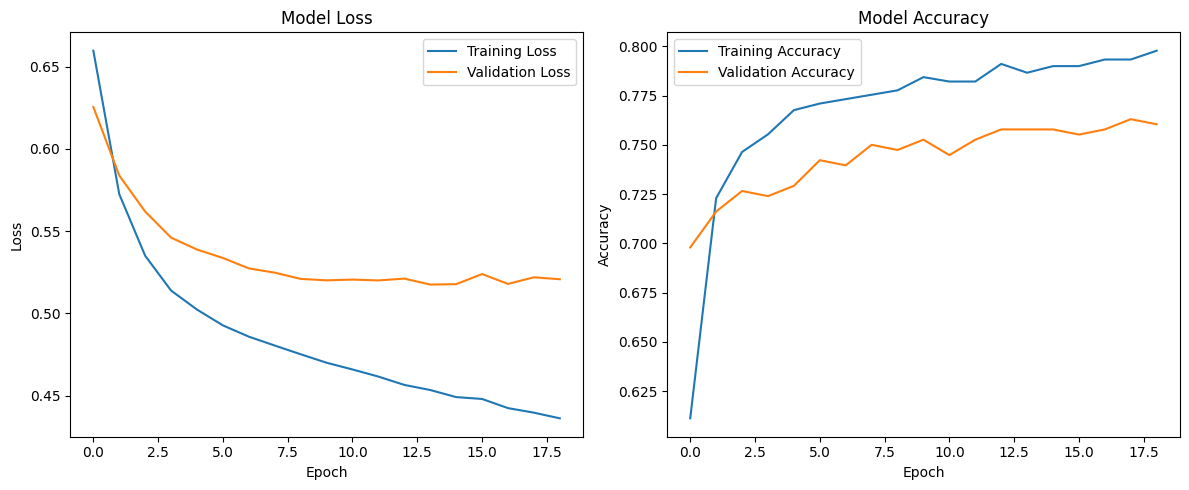

In [124]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Q.No-19`    Evaluate the model's performance using the test data.**

**Ans :-**

In [125]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

10/10 - 0s - 19ms/step - accuracy: 0.7500 - loss: 0.4903
Test Loss: 0.4903
Test Accuracy: 0.7500
